<h3>Carrega as bibliotecas necessárias</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Input
from keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler


2024-06-04 07:29:26.889129: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-04 07:29:27.101971: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 07:29:28.127721: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<h3>Funções necessárias</h3>

In [2]:
def get_XY(data, time_steps):
    Y_ind = np.arange(time_steps, len(data), time_steps)
    Y = data[Y_ind]
    rows_x = len(Y)
    X = data[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

<h3>Carrega o dataset sobre manchas solares</h3>

In [3]:
df = pd.read_csv("manchas-solares.csv")
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [4]:
data = np.array(df['Sunspots'].values.astype('float32')).reshape(-1, 1)
data

array([[58. ],
       [62.6],
       [70. ],
       ...,
       [55.8],
       [33.3],
       [33.4]], dtype=float32)

<h3>Escalona os dados e divide entre treino e teste</h3>

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
data.shape

(2820, 1)

In [6]:
fraction = 0.6
n = len(data)
split = int(fraction * n) # 80% train, 20% test
train = data[range(split)]
test = data[split:]

In [7]:
train.shape

(1692, 1)

In [8]:
test.shape

(1128, 1)

In [17]:
steps = 12
train_x, train_y = get_XY(train,steps)
test_x, test_y = get_XY(test,steps)


<h3>Cria a rede recorrente</h3>

In [10]:
rnn = Sequential()
rnn.add(Input(shape=train.shape))
rnn.add(SimpleRNN(units = 3, activation = 'tanh'))
rnn.add(Dense(units = 1, activation = 'tanh'))
        
optimizer = Adam()

rnn.compile(optimizer = optimizer , loss = "MSE", metrics=["accuracy"])

<h3>Treina a rede</h3>

In [11]:
epochs = 30
batch_size = 1
rnn.fit(train_x, train_y, epochs = epochs, batch_size = batch_size)

Epoch 1/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0682 - loss: 0.0125  
Epoch 2/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0604 - loss: 0.0061
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0618 - loss: 0.0055
Epoch 4/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0477 - loss: 0.0061   
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0683 - loss: 0.0052
Epoch 6/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0255 - loss: 0.0060 
Epoch 7/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0499 - loss: 0.0056 
Epoch 8/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0731 - loss: 0.0052
Epoch 9/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0969 - loss: 0.0066
Epoch 10/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0749 - loss: 0.0045 
Epoch 11/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0664 - loss: 0.0051
Epoch 12/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [12]:
train_predict = rnn.predict(train_x)
test_predict = rnn.predict(test_x)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<h3>Mostrando as predições</h3>

In [13]:
full_y = np.append(train_y, test_y)
full_p = np.append(train_predict, test_predict)

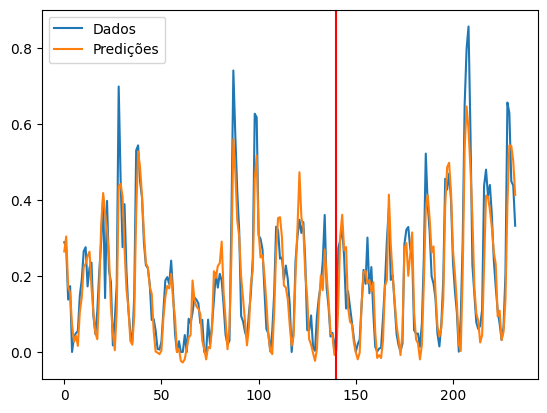

In [14]:
plt.figure()
plt.plot(full_y)
plt.plot(full_p)
plt.axvline(x=len(train_y), color='r')
plt.legend(['Dados', 'Predições'])